In [3]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from os import system
%matplotlib inline

SANPI_DIR = Path('/share/compling/projects/sanpi')
input_path = SANPI_DIR / 'results/ucs_tables/readable/polarized-bigrams_min15x.rsort-view.txt'
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 180)

if input_path.suffix == '.txt': 
    input_csv = input_path.with_suffix('.csv')
    system(f'python {SANPI_DIR}/script/ucs_to_csv.py -u {input_path}')
else: 
    input_csv = input_path

UCS table text converted & saved as /share/compling/projects/sanpi/results/ucs_tables/readable/polarized-bigrams_min15x.rsort-view.csv


In [4]:
df = pd.read_csv(input_csv)
df.head(3)

,l1,l2,f,E11,r_log_likelihood,...,am_p1_given2,am_p2_given1,f1,f2,N
0,NEGATED,exactly_shy,124,4.692643,1514,...,0.962158,0.000039,3151804,124,83284343
1,NEGATED,exactly_forthcoming,107,4.049297,1728,...,0.962157,0.000034,3151804,107,83284343
2,NEGATED,exactly_practical,106,4.011453,1744,...,0.962157,0.000034,3151804,106,83284343


In [5]:

# drop `am_odds_ratio` & `r_odds_ratio` because they are messed up
df = df.loc[:, ~df.columns.str.endswith('odds_ratio')]
lex_cols = df.columns[:2]
df.iloc[:, :2] = df.iloc[:, :2].astype('string')
# df.info(memory_usage='deep')
df['l1'] = df.l1.astype('category')
# df.info(memory_usage='deep')


def get_int_cols(_df):
    return _df.columns.str.startswith(('r_', 'f', 'N'))


def get_float_cols(_df):
    return _df.columns.str.startswith('am_', 'E')


is_int = get_int_cols(df)
is_am = get_float_cols(df)
df.loc[:, is_int] = df.loc[:, is_int].apply(pd.to_numeric, downcast='unsigned')
# df.info(memory_usage='deep')
df.loc[:, is_am] = df.loc[:, is_am].apply(pd.to_numeric, downcast='float')
# df.info(memory_usage='deep')

df['adv'] = df.l2.str.split('_').str.get(0).astype('string').astype('category')
df['adj'] = df.l2.str.split('_').str.get(1).astype('string').astype('category')
df['abs_am_p1_given2'] = df.am_p1_given2.abs()
df['bin_am_p1_given2'] = df.am_p1_given2.round(
    1).astype('string').astype('category')
df['env_sensitivity'] = (df.bin_am_p1_given2.astype(
    'string') + '=' + df.l1.astype('string').apply(lambda e: e[:3])).astype('string')
df

,l1,l2,f,E11,r_log_likelihood,...,adv,adj,abs_am_p1_given2,bin_am_p1_given2,env_sensitivity
0,NEGATED,exactly_shy,124,4.692643,1514,...,exactly,shy,0.962158,1.0,1.0=NEG
1,NEGATED,exactly_forthcoming,107,4.049297,1728,...,exactly,forthcoming,0.962157,1.0,1.0=NEG
2,NEGATED,exactly_practical,106,4.011453,1744,...,exactly,practical,0.962157,1.0,1.0=NEG
3,NEGATED,exactly_impressive,100,3.784390,1839,...,exactly,impressive,0.962157,1.0,1.0=NEG
4,NEGATED,exactly_straight...,83,3.141043,2164,...,exactly,straightforward,0.962157,1.0,1.0=NEG
...,...,...,...,...,...,...,...,...,...,...,...
192266,COMPLEMENT,yet_ready,223,7541.379500,192249,...,yet,ready,0.933793,-0.9,-0.9=COM
192267,COMPLEMENT,exactly_easy,30,1058.371700,192100,...,exactly,easy,0.934896,-0.9,-0.9=COM
192268,COMPLEMENT,exactly_new,38,1364.337400,192143,...,exactly,new,0.935374,-0.9,-0.9=COM
192269,COMPLEMENT,even_sure,345,14308.223000,192265,...,even,sure,0.939124,-0.9,-0.9=COM


In [6]:
df_c = df.copy()[df.columns.to_list()[-5:]+df.columns.to_list()[:-5]]
print(df_c.filter(regex=r'^(a[db]|E|env|am_[op])|l1|f$')
      .sort_values('abs_am_p1_given2', ascending=False).head(40)
      .round(4).to_markdown(floatfmt=',.4f'))


|    | adv         | adj             |   abs_am_p1_given2 | env_sensitivity   | l1      |   f |    E11 |   am_odds_ratio_disc |   am_p1_given2 |   am_p2_given1 |
|---:|:------------|:----------------|-------------------:|:------------------|:--------|----:|-------:|---------------------:|---------------:|---------------:|
|  0 | exactly     | shy             |             0.9622 | 1.0=NEG           | NEGATED | 124 | 4.6926 |               3.8015 |         0.9622 |         0.0000 |
|  1 | exactly     | forthcoming     |             0.9622 | 1.0=NEG           | NEGATED | 107 | 4.0493 |               3.7377 |         0.9622 |         0.0000 |
|  2 | exactly     | practical       |             0.9622 | 1.0=NEG           | NEGATED | 106 | 4.0115 |               3.7336 |         0.9622 |         0.0000 |
|  3 | exactly     | impressive      |             0.9622 | 1.0=NEG           | NEGATED | 100 | 3.7844 |               3.7085 |         0.9622 |         0.0000 |
|  4 | exactly     | straigh

## 40 Most Sensitive Environment-Bigram Combos, positive _or negative_

|        | adv         | adj             |   abs_am_p1_given2 | env_sensitivity   | l1         |     f |         E11 |   am_odds_ratio_disc |   am_p1_given2 |   am_p2_given1 |
|-------:|:------------|:----------------|-------------------:|:------------------|:-----------|------:|------------:|---------------------:|---------------:|---------------:|
|      0 | exactly     | shy             |             0.9622 | 1.0=NEG           | NEGATED    |   124 |      4.6926 |               3.8015 |         0.9622 |         0.0000 |
|      1 | exactly     | forthcoming     |             0.9622 | 1.0=NEG           | NEGATED    |   107 |      4.0493 |               3.7377 |         0.9622 |         0.0000 |
|      2 | exactly     | practical       |             0.9622 | 1.0=NEG           | NEGATED    |   106 |      4.0115 |               3.7336 |         0.9622 |         0.0000 |
|      3 | exactly     | impressive      |             0.9622 | 1.0=NEG           | NEGATED    |   100 |      3.7844 |               3.7085 |         0.9622 |         0.0000 |
|      4 | exactly     | straightforward |             0.9622 | 1.0=NEG           | NEGATED    |    83 |      3.1410 |               3.6280 |         0.9622 |         0.0000 |
|      5 | exactly     | reassuring      |             0.9622 | 1.0=NEG           | NEGATED    |    78 |      2.9518 |               3.6012 |         0.9622 |         0.0000 |
|      6 | exactly     | intuitive       |             0.9622 | 1.0=NEG           | NEGATED    |    76 |      2.8761 |               3.5900 |         0.9622 |         0.0000 |
|      7 | exactly     | novel           |             0.9622 | 1.0=NEG           | NEGATED    |    66 |      2.4977 |               3.5291 |         0.9622 |         0.0000 |
|      9 | exactly     | romantic        |             0.9622 | 1.0=NEG           | NEGATED    |    64 |      2.4220 |               3.5158 |         0.9622 |         0.0000 |
|      8 | exactly     | unheard         |             0.9622 | 1.0=NEG           | NEGATED    |    65 |      2.4599 |               3.5225 |         0.9622 |         0.0000 |
|     10 | that        | thrilled        |             0.9622 | 1.0=NEG           | NEGATED    |    59 |      2.2328 |               3.4808 |         0.9622 |         0.0000 |
|     11 | exactly     | kind            |             0.9622 | 1.0=NEG           | NEGATED    |    52 |      1.9679 |               3.4264 |         0.9622 |         0.0000 |
|     12 | exactly     | obvious         |             0.9622 | 1.0=NEG           | NEGATED    |    50 |      1.8922 |               3.4096 |         0.9622 |         0.0000 |
|     13 | exactly     | worried         |             0.9622 | 1.0=NEG           | NEGATED    |    47 |      1.7787 |               3.3830 |         0.9622 |         0.0000 |
|     14 | exactly     | inexpensive     |             0.9622 | 1.0=NEG           | NEGATED    |    46 |      1.7408 |               3.3737 |         0.9622 |         0.0000 |
|     15 | only        | yummy           |             0.9622 | 1.0=NEG           | NEGATED    |    44 |      1.6651 |               3.3546 |         0.9622 |         0.0000 |
|     21 | exactly     | alone           |             0.9622 | 1.0=NEG           | NEGATED    |    35 |      1.3245 |               3.2565 |         0.9622 |         0.0000 |
|     20 | exactly     | transparent     |             0.9622 | 1.0=NEG           | NEGATED    |    35 |      1.3245 |               3.2565 |         0.9622 |         0.0000 |
|     19 | exactly     | user-friendly   |             0.9622 | 1.0=NEG           | NEGATED    |    36 |      1.3624 |               3.2686 |         0.9622 |         0.0000 |
|     18 | exactly     | supportive      |             0.9622 | 1.0=NEG           | NEGATED    |    37 |      1.4002 |               3.2803 |         0.9622 |         0.0000 |
|     16 | yet         | privy           |             0.9622 | 1.0=NEG           | NEGATED    |    38 |      1.4381 |               3.2917 |         0.9622 |         0.0000 |
|     17 | exactly     | unprecedented   |             0.9622 | 1.0=NEG           | NEGATED    |    37 |      1.4002 |               3.2803 |         0.9622 |         0.0000 |
|     27 | exactly     | illegal         |             0.9622 | 1.0=NEG           | NEGATED    |    32 |      1.2110 |               3.2182 |         0.9622 |         0.0000 |
|     31 | necessarily | evident         |             0.9622 | 1.0=NEG           | NEGATED    |    30 |      1.1353 |               3.1906 |         0.9622 |         0.0000 |
|     30 | exactly     | plentiful       |             0.9622 | 1.0=NEG           | NEGATED    |    31 |      1.1732 |               3.2046 |         0.9622 |         0.0000 |
|     29 | necessarily | noticeable      |             0.9622 | 1.0=NEG           | NEGATED    |    31 |      1.1732 |               3.2046 |         0.9622 |         0.0000 |
|     28 | exactly     | dominant        |             0.9622 | 1.0=NEG           | NEGATED    |    31 |      1.1732 |               3.2046 |         0.9622 |         0.0000 |
|     26 | exactly     | fashionable     |             0.9622 | 1.0=NEG           | NEGATED    |    32 |      1.2110 |               3.2182 |         0.9622 |         0.0000 |
|     25 | only        | appalling       |             0.9622 | 1.0=NEG           | NEGATED    |    33 |      1.2488 |               3.2313 |         0.9622 |         0.0000 |
|     24 | only        | captivating     |             0.9622 | 1.0=NEG           | NEGATED    |    33 |      1.2488 |               3.2313 |         0.9622 |         0.0000 |
|     23 | necessarily | transferable    |             0.9622 | 1.0=NEG           | NEGATED    |    34 |      1.2867 |               3.2441 |         0.9622 |         0.0000 |
|     22 | necessarily | interchangeable |             0.9622 | 1.0=NEG           | NEGATED    |    34 |      1.2867 |               3.2441 |         0.9622 |         0.0000 |
|     32 | exactly     | surprising      |             0.9554 | 1.0=NEG           | NEGATED    |   441 |     16.8027 |               3.5062 |         0.9554 |         0.0001 |
|     33 | all         | uncommon        |             0.9535 | 1.0=NEG           | NEGATED    |   228 |      8.7041 |               3.3662 |         0.9535 |         0.0001 |
|     34 | necessarily | sure            |             0.9532 | 1.0=NEG           | NEGATED    |   222 |      8.4770 |               3.3547 |         0.9532 |         0.0001 |
|     35 | only        | inaccurate      |             0.9523 | 1.0=NEG           | NEGATED    |   201 |      7.6823 |               3.3116 |         0.9523 |         0.0001 |
|     36 | exactly     | glamorous       |             0.9501 | 1.0=NEG           | NEGATED    |    82 |      3.1410 |               3.1456 |         0.9501 |         0.0000 |
|     37 | exactly     | unexpected      |             0.9501 | 1.0=NEG           | NEGATED    |    82 |      3.1410 |               3.1456 |         0.9501 |         0.0000 |
| 124017 | yet         | clear           |             0.9496 | -0.9=COM          | COMPLEMENT |   136 | 10,288.3350 |              -3.2951 |        -0.9496 |        -0.0033 |
|     38 | yet         | clear           |             0.9496 | 0.9=NEG           | NEGATED    | 10557 |    404.6648 |               3.2951 |         0.9496 |         0.0033 |


In [7]:
def heatmap(df, columns=None, save_name=None, size=(8, 10)):

    plt.figure(figsize=size, dpi=120, facecolor="white")

    adv_labels = df.index
    if columns:
        df = df.loc[:, columns]
    df = df.astype('float')
    # Displaying dataframe as an heatmap
    # with diverging colourmap as RdYlBu
    plt.imshow(df, cmap="plasma")
    # plt.imshow(df, cmap="gist_rainbow")
    # plt.imshow(df, cmap="jet")
    # plt.imshow(df, cmap="viridis")
    # plt.autoscale(enable=True, axis='both')
    # Displaying a color bar to understand
    # which color represents which range of data
    plt.colorbar()
    # Assigning labels of x-axis
    # according to dataframe
    plt.xticks(range(len(df.columns)), df.columns, rotation=-20)
    # Assigning labels of y-axis
    # according to dataframe
    plt.yticks(range(len(df.index)), adv_labels)
    # Displaying the figure
    plt.show()


def corners(df, size: int = 5):
    index_name = df.index.name or 'frequencies'
    columns_name = df.columns.name or 'categories'
    df = df.reset_index().reset_index().set_index(
        ['index', index_name])
    df = df.T.reset_index().reset_index().set_index(
        ['index', columns_name]).T
    cdf = pd.concat(
        [dfs.iloc[:, :size].assign(__='...')
         .join(dfs.iloc[:, -size:])
         for dfs in (df.head(size).T.assign(__='...').T,
                     df.tail(size))])
    cdf = cdf.reset_index().set_index(index_name)
    cdf.pop('index')
    cdf = cdf.T.reset_index().set_index(columns_name)
    cdf.pop('index')
    return cdf.T.rename(columns={'': '...'}, index={'': '...'})

def sample_counts(frq_table, label,
                  rows=pd.Series(dtype='string'),
                  columns=pd.Series(dtype='string')):
    # color = 'Set1'
    # color = 'gist_rainbow'
    color = "nipy_spectral_r"
    s = frq_table.copy()
    if not any(rows): 
        s = s[s.index != 'SUM']
        s = s.iloc[5:int(frq_table.shape[0]*0.4), :] if len(s.index) >= 80 else s
        rows = s.sample(min(len(s), 16)).index
    if not any(columns): 
        s = s.loc[:, s.columns != 'SUM']
        s = s.iloc[:, 5:int(frq_table.shape[1]*0.4)] if len(s.columns) > 50 else s
        columns = s.T.sample(min(len(s.T), 8)).index
    sample_df = s.loc[rows, columns]
    # print(sample_df.describe().T.round(2).to_markdown())
    # fig = plt.figure(figsize=(6, 8), dpi=300)
    fig = plt.figure(dpi=130)
    # ax.barh(s20x10, width=1)
    sample_df.plot(kind='barh',
                   width=0.8,
                   figsize=(8, 10),
                   position=1,
                   title=f'{label} of sample',
                   grid=True,
                   colormap=color,
                   # colormap="gist_rainbow",
                   # colormap="rainbow",
                   #  colormap="brg",
                   #   colormap="nipy_spectral_r",
                   #    colormap="Set1",
                   ax=plt.gca())
    plt.show()
    fig = plt.figure(dpi=150)
    sample_df.plot(kind='barh',
                   stacked=True,
                   width=0.8,
                   figsize=(8, 10),
                   position=1,
                   title=label,
                   grid=True,
                   colormap=color,
                   # colormap="gist_rainbow",
                   #  colormap="brg",
                   #    colormap="nipy_spectral_r",
                   #    colormap="Set1",
                   ax=plt.gca()
                   )
    plt.show()
    heatmap(sample_df, size=(8, 10))
    # print(sample_df.round().to_markdown(floatfmt=',.0f'))

    return s, sample_df

In [8]:
env_grouped = [env_vals.add_suffix(f'_{env[:3]}') for env, env_vals in df.loc[:, ~df.columns.str.startswith('r_') ].set_index('l2').groupby('l1')]
wide_df = env_grouped[0].join(env_grouped[1]).sort_index(axis=1)
wide_df.loc[:, get_int_cols(wide_df)] = wide_df.loc[:, get_int_cols(wide_df)].apply(pd.to_numeric, downcast='unsigned')
wide_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176122 entries, most_incredible to yet_clear
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   E11_COM                   176122 non-null  float64 
 1   E11_NEG                   14651 non-null   float64 
 2   N_COM                     176122 non-null  uint32  
 3   N_NEG                     14651 non-null   float64 
 4   abs_am_p1_given2_COM      176122 non-null  float32 
 5   abs_am_p1_given2_NEG      14651 non-null   float32 
 6   adj_COM                   176122 non-null  category
 7   adj_NEG                   14651 non-null   category
 8   adv_COM                   176122 non-null  category
 9   adv_NEG                   14651 non-null   category
 10  am_Dice_COM               176122 non-null  float32 
 11  am_Dice_NEG               14651 non-null   float32 
 12  am_log_likelihood_COM     176122 non-null  float32 
 13  am_log_likelihood

In [9]:
# wide_df.to_pickle(input_csv.with_name(input_csv.stem+'_unstacked.pkl.gz'))


## COMPLEMENT

count = 176122

|                      |   mean |      std |         min |   25% |   50% |   75% |        max |
|:---------------------|-------:|---------:|------------:|------:|------:|------:|-----------:|
| abs_am_p1_given2     |   0.05 |     0.07 |        0.00 |  0.03 |  0.04 |  0.04 |       0.95 |
| am_log_likelihood    | -20.30 | 1,167.47 | -152,707.20 |  0.33 |  1.85 |  4.78 |  75,162.62 |
| am_log_likelihood_tt |  55.22 | 1,166.36 |        0.00 |  1.39 |  2.62 |  7.67 | 152,707.20 |
| am_odds_ratio_disc   |   0.28 |     0.57 |       -3.30 |  0.06 |  0.28 |  0.61 |       2.93 |
| am_Dice              |   0.00 |     0.00 |        0.00 |  0.00 |  0.00 |  0.00 |       0.03 |
| am_t_score           |  -0.16 |     5.61 |     -870.56 |  0.11 |  0.19 |  0.31 |      39.40 |
| am_p1_given2         |   0.01 |     0.09 |       -0.95 |  0.01 |  0.04 |  0.04 |       0.04 |
| am_p2_given1         |   0.00 |     0.00 |       -0.01 |  0.00 |  0.00 |  0.00 |       0.01 |

|     |

| adv           |   -0.9 |   -0.8 |   -0.7 |   -0.6 |   -0.5 |
|:--------------|-------:|-------:|-------:|-------:|-------:|
| about         |      0 |      0 |      0 |      1 |      0 |
| actually      |      1 |      0 |      0 |      1 |      0 |
| all           |      0 |      1 |      3 |      3 |      1 |
| altogether    |      2 |      0 |      2 |      4 |      3 |
| always        |      2 |     13 |     19 |     22 |     19 |
| any           |      0 |      0 |      0 |      1 |      2 |
| anywhere      |      0 |      0 |      0 |      0 |      1 |
| around        |      0 |      0 |      0 |      1 |      0 |
| as            |      1 |      2 |      8 |     19 |     16 |
| best          |      0 |      1 |      0 |      0 |      0 |
| completely    |      0 |      0 |      1 |      2 |      3 |
| currently     |      0 |      0 |      0 |      1 |      0 |
| directly      |      0 |      0 |      0 |      0 |      1 |
| economically  |      0 |      0 |      0 |      1 |  

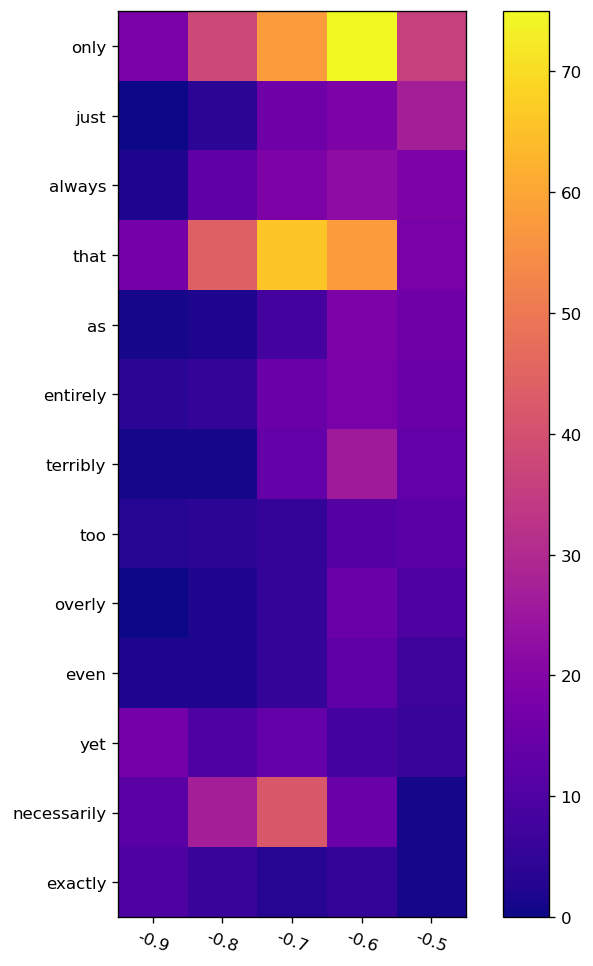


## NEGATED

count = 16149

|                      |   mean |      std |        min |   25% |   50% |    75% |        max |
|:---------------------|-------:|---------:|-----------:|------:|------:|-------:|-----------:|
| abs_am_p1_given2     |   0.22 |     0.26 |       0.00 |  0.03 |  0.09 |   0.32 |       0.96 |
| am_log_likelihood    | 322.42 | 3,842.12 | -75,162.62 |  0.32 | 42.41 | 146.08 | 152,707.20 |
| am_log_likelihood_tt | 531.77 | 3,818.81 |       0.00 | 20.52 | 73.28 | 213.44 | 152,707.20 |
| am_odds_ratio_disc   |   0.63 |     0.89 |      -2.20 |  0.05 |  0.59 |   1.16 |       3.80 |
| am_Dice              |   0.00 |     0.00 |       0.00 |  0.00 |  0.00 |   0.00 |       0.03 |
| am_t_score           |  -2.16 |    39.69 |  -1,333.16 |  0.53 |  3.85 |   6.24 |     170.14 |
| am_p1_given2         |   0.21 |     0.27 |      -0.04 |  0.00 |  0.09 |   0.32 |       0.96 |
| am_p2_given1         |   0.00 |     0.00 |      -0.01 |  0.00 |  0.00 |   0.00 |       0.01 |

|    |   ab

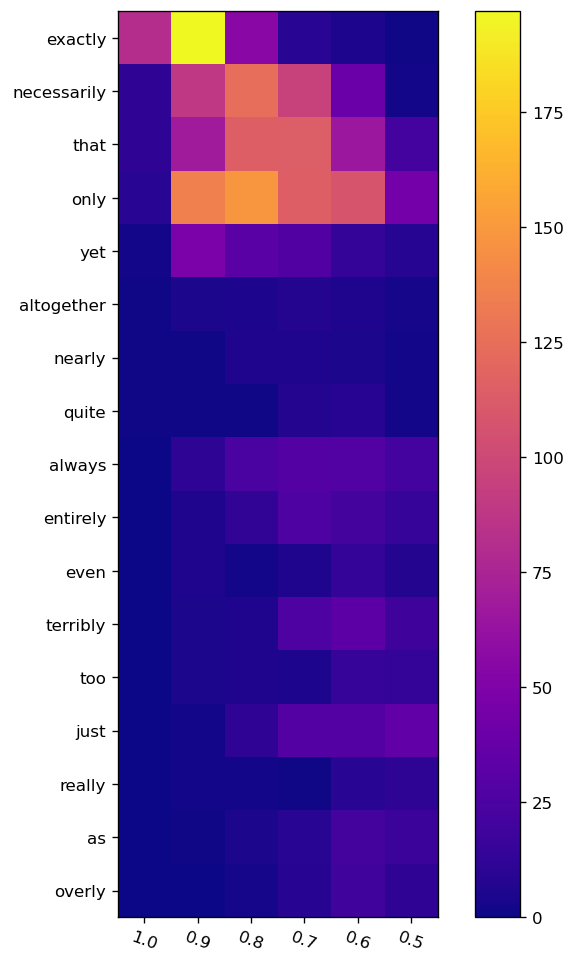

In [10]:
pd.set_option('display.max_columns', 20)
for env, pdf in df.groupby('l1'): 
    pdf = pdf.loc[:, pdf.columns.str.startswith(('a', 'b'))]
    pdf = pdf[pdf.columns.to_list()[-2:] + pdf.columns.to_list()[:-2]]
    desc = pdf.describe().T
    print(f'\n## {env}',
        f"count = {int(desc.pop('count').unique().squeeze())}",
        desc.to_markdown(floatfmt=',.2f'),
        pdf.head(20).to_markdown(floatfmt='.2f'),
        pdf.tail(20).to_markdown(floatfmt='.2f'),
        '---------',
        sep='\n\n')
    strong = pdf.copy().loc[pdf.abs_am_p1_given2>=0.5, :]
    ct = pd.crosstab(strong.adv.astype('string'), strong.bin_am_p1_given2).sort_index(axis=1,ascending=False)
    print(ct.to_markdown())

    heatmap(ct.loc[ct.sum(axis=1)>=20,:].head(40).sort_values(ct.columns.to_series().astype('float').nlargest(3).astype('string').to_list(), ascending=False))

In [11]:
exactly=df.loc[df.adv=='exactly', :]
exactly.value_counts(['bin_am_p1_given2','l1',]).to_frame('env_sensitivity_levels').sort_values('bin_am_p1_given2', ascending=False)
exactly.loc[exactly.abs_am_p1_given2 > 0.6, :]

,l1,l2,f,E11,r_log_likelihood,r_log_likelihood_tt,r_odds_ratio_disc,r_Dice,r_t_score,r_p1_given2,...,am_p1_given2,am_p2_given1,f1,f2,N,adv,adj,abs_am_p1_given2,bin_am_p1_given2,env_sensitivity
0,NEGATED,exactly_shy,124,4.692643,1514,2900,1,6166,1727,1,...,0.962158,0.000039,3151804,124,83284343,exactly,shy,0.962158,1.0,1.0=NEG
1,NEGATED,exactly_forthcoming,107,4.049297,1728,3284,2,7004,1980,2,...,0.962157,0.000034,3151804,107,83284343,exactly,forthcoming,0.962157,1.0,1.0=NEG
2,NEGATED,exactly_practical,106,4.011453,1744,3314,3,7078,2003,3,...,0.962157,0.000034,3151804,106,83284343,exactly,practical,0.962157,1.0,1.0=NEG
3,NEGATED,exactly_impressive,100,3.784390,1839,3484,4,7463,2107,4,...,0.962157,0.000032,3151804,100,83284343,exactly,impressive,0.962157,1.0,1.0=NEG
4,NEGATED,exactly_straight...,83,3.141043,2164,4064,5,8680,2447,5,...,0.962157,0.000026,3151804,83,83284343,exactly,straightforward,0.962157,1.0,1.0=NEG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192245,COMPLEMENT,exactly_happy,27,450.289060,191803,944,192246,138410,191826,192246,...,-0.904469,-0.000140,80132539,468,83284343,exactly,happy,0.904469,-0.9,-0.9=COM
192253,COMPLEMENT,exactly_sure,437,8949.013900,192253,37,192254,31284,192238,192253,...,-0.915274,-0.002807,80132539,9301,83284343,exactly,sure,0.915274,-0.9,-0.9=COM
192258,COMPLEMENT,exactly_clear,75,1765.556500,192172,199,192259,78850,192149,192259,...,-0.921304,-0.000557,80132539,1835,83284343,exactly,clear,0.921304,-0.9,-0.9=COM
192267,COMPLEMENT,exactly_easy,30,1058.371700,192100,343,192268,130489,192142,192268,...,-0.934896,-0.000339,80132539,1100,83284343,exactly,easy,0.934896,-0.9,-0.9=COM


In [12]:
pd.crosstab(index=exactly.adj, columns=exactly.l1, values=exactly.am_p1_given2, aggfunc='mean')


l1,COMPLEMENT,NEGATED
adj,,
able,NaN,0.851045
abundant,NaN,0.962156
accessible,NaN,0.920490
accurate,-0.807943,0.807943
affordable,NaN,0.908102
...,...,...
worth,NaN,0.793143
worthy,NaN,0.897640
wrong,-0.248100,0.248100


| adv          |   -0.9=COM |   -0.8=COM |   -0.7=COM |   -0.6=COM |   -0.5=COM |   -0.4=COM |   -0.3=COM |   -0.2=COM |   -0.1=COM |   -0.0=COM |   0.0=NEG |   0.1=NEG |   0.2=NEG |   0.3=NEG |   0.4=NEG |   0.5=NEG |   0.6=NEG |   0.7=NEG |   0.8=NEG |   0.9=NEG |   contrast |   neg_contrast |
|:-------------|-----------:|-----------:|-----------:|-----------:|-----------:|-----------:|-----------:|-----------:|-----------:|-----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|-----------:|---------------:|
| really       |      -0.85 |      -1.00 |      -1.00 |      -0.57 |      -0.49 |      -0.39 |      -0.29 |      -0.19 |      -0.08 |      -0.02 |      0.02 |      0.09 |      0.20 |      0.29 |      0.40 |      0.49 |      0.57 |      0.67 |      0.81 |      0.90 |       9.32 |          13.75 |
| quite        |      -1.00 |      -0.82 |      -0.67 |      -0.60 |      -0.47 |      -0.41 |      -0.31 |  

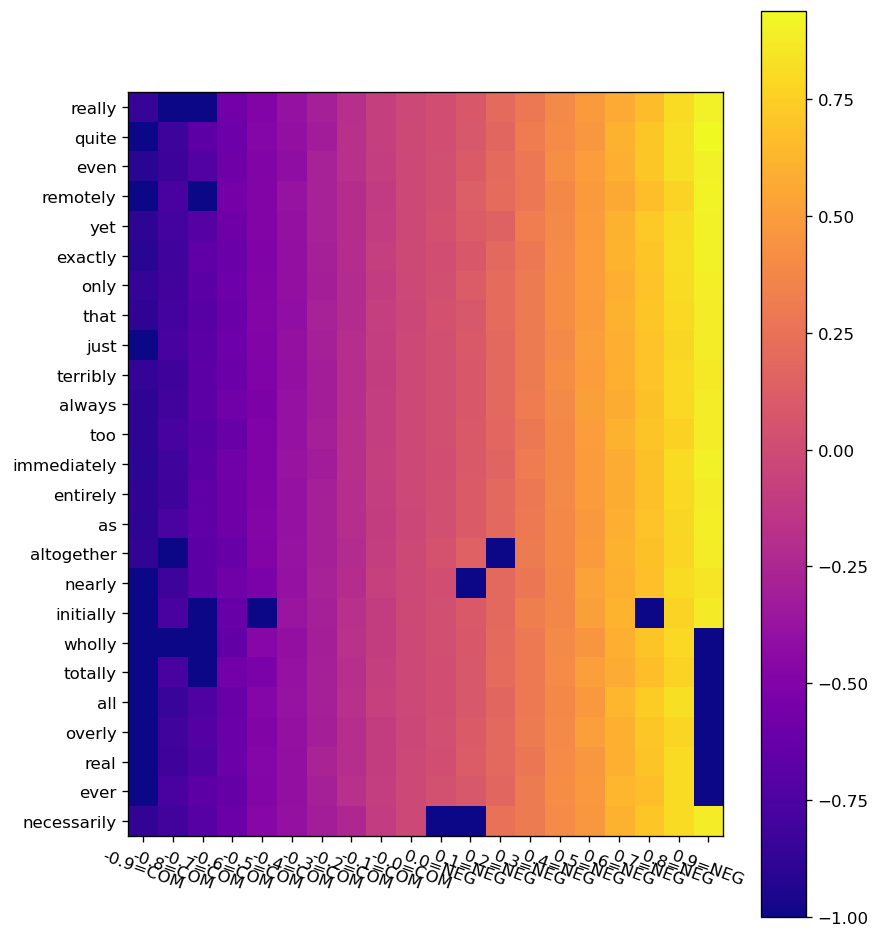

In [13]:
def crosstab_by_env(df, col='adv', func='mean', values='am_p1_given2', env_var='l1', sort_by='neg_contrast', fillna=False):
    _ct = pd.crosstab(index=df[col], columns=df[env_var], values=df[values], aggfunc=func)
    if fillna: 
        _ct = _ct.fillna(-1)
    if env_var != 'l1': 
        # _ct = _ct.filter(regex=r'0.[4-9]')
        _ct = _ct[[x for x in ['-0.9=COM','-0.8=COM','-0.7=COM','-0.6=COM','-0.5=COM','-0.4=COM',
                '-0.3=COM','-0.2=COM','-0.1=COM','-0.0=COM',
                '0.0=NEG','0.1=NEG','0.2=NEG','0.3=NEG',
                  '0.4=NEG','0.5=NEG','0.6=NEG','0.7=NEG','0.8=NEG','0.9=NEG']
                   if x in _ct.columns]]
        _ct['NEGATED'] = _ct.loc[:,_ct.columns.str.endswith('NEG')].sum(axis=1)
        _ct['COMPLEMENT'] = _ct.loc[:,_ct.columns.str.endswith('COM')].sum(axis=1)
    _ct = _ct.assign(contrast=(_ct['COMPLEMENT'] - _ct['NEGATED']).abs())
    _ct = _ct.assign(neg_contrast=_ct['NEGATED'] + _ct['contrast']).sort_values(sort_by, ascending=False)
    if _ct.shape[1] > 5: 
        _ct = _ct.loc[:, ~_ct.columns.isin(['COMPLEMENT', 'NEGATED'])]
    print(_ct.head(40).to_markdown(floatfmt='.2f'))
    heatmap(_ct.iloc[:25,:-2])
crosstab_by_env(df, env_var='env_sensitivity', func='median', fillna=True)

| adv          |   -0.9=COM |   -0.8=COM |   -0.7=COM |   -0.6=COM |   -0.5=COM |   -0.4=COM |   -0.3=COM |   -0.2=COM |   -0.1=COM |   -0.0=COM |   0.0=NEG |   0.1=NEG |   0.2=NEG |   0.3=NEG |   0.4=NEG |   0.5=NEG |   0.6=NEG |   0.7=NEG |   0.8=NEG |   0.9=NEG |   contrast |   neg_contrast |
|:-------------|-----------:|-----------:|-----------:|-----------:|-----------:|-----------:|-----------:|-----------:|-----------:|-----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|-----------:|---------------:|
| only         |     -15.77 |     -30.18 |     -40.25 |     -44.73 |     -39.37 |     -40.90 |     -42.19 |     -33.46 |     -18.34 |      -2.03 |      0.48 |      8.42 |     17.63 |     25.42 |     34.59 |     44.03 |     64.45 |     79.93 |    119.67 |    121.45 |     823.28 |        1339.35 |
| as           |      -0.89 |      -1.53 |      -5.50 |     -11.34 |     -27.65 |     -64.36 |     -88.58 |  

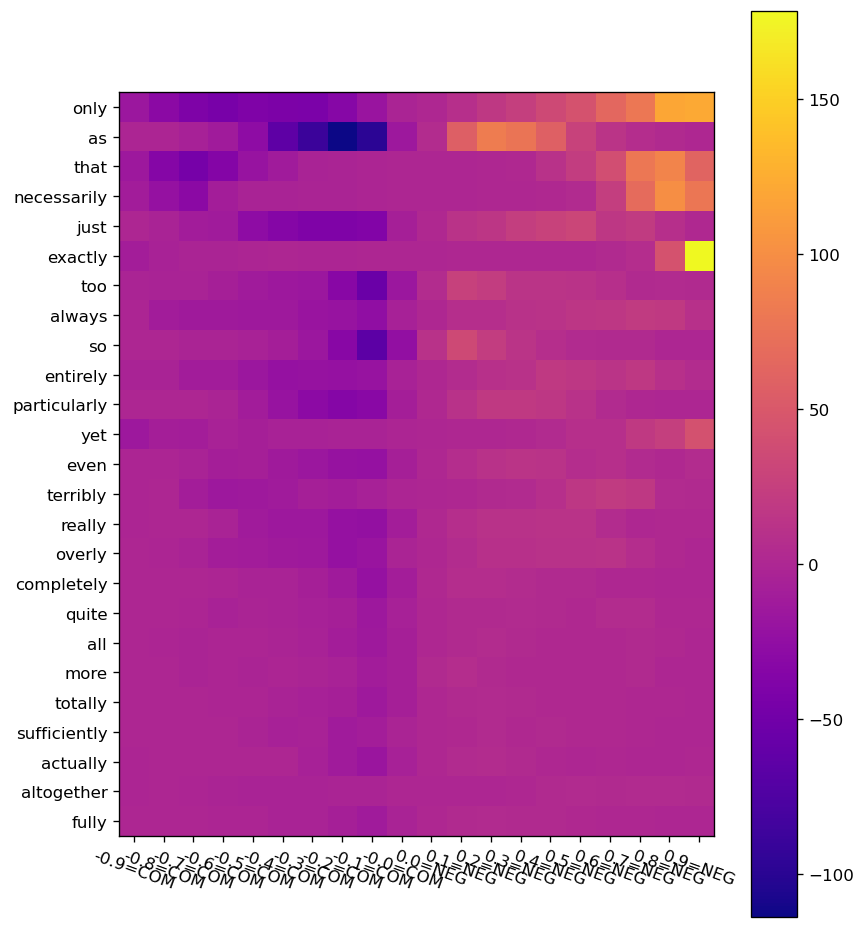

In [14]:
crosstab_by_env(df, env_var='env_sensitivity', func='sum')

| adv            |   COMPLEMENT |   NEGATED |   contrast |   neg_contrast |
|:---------------|-------------:|----------:|-----------:|---------------:|
| exactly        |        -1.20 |      2.53 |       3.73 |           6.25 |
| together       |         0.26 |      2.97 |       2.72 |           5.69 |
| necessarily    |        -1.49 |      2.07 |       3.56 |           5.63 |
| that           |        -1.63 |      1.91 |       3.54 |           5.45 |
| honestly       |         0.32 |      2.45 |       2.12 |           4.57 |
| yet            |        -0.26 |      1.94 |       2.20 |           4.14 |
| only           |        -0.96 |      1.58 |       2.54 |           4.12 |
| anymore        |        -0.19 |      1.82 |       2.01 |           3.83 |
| altogether     |        -0.56 |      1.61 |       2.16 |           3.77 |
| this           |        -0.39 |      1.65 |       2.04 |           3.69 |
| precisely      |        -0.27 |      1.58 |       1.85 |           3.43 |
| terribly  

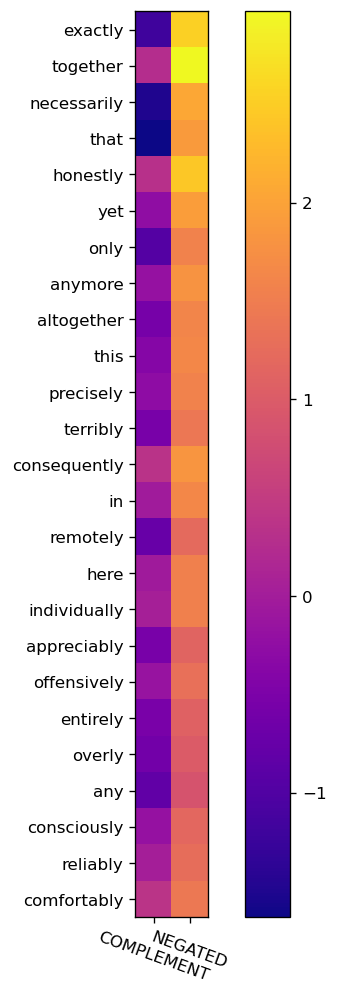

In [15]:
crosstab_by_env(df,values='am_odds_ratio_disc')

| adv          |   -0.9=COM |   -0.8=COM |   -0.7=COM |   -0.6=COM |   -0.5=COM |   -0.4=COM |   -0.3=COM |   -0.2=COM |   -0.1=COM |   -0.0=COM |   0.0=NEG |   0.1=NEG |   0.2=NEG |   0.3=NEG |   0.4=NEG |   0.5=NEG |   0.6=NEG |   0.7=NEG |   0.8=NEG |   0.9=NEG |   contrast |   neg_contrast |
|:-------------|-----------:|-----------:|-----------:|-----------:|-----------:|-----------:|-----------:|-----------:|-----------:|-----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|-----------:|---------------:|
| as           |      -2.50 |      -4.03 |     -14.62 |     -31.23 |     -82.36 |    -210.65 |    -330.65 |    -521.26 |    -610.20 |    -151.82 |     49.25 |    344.51 |    384.97 |    286.33 |    188.98 |     85.32 |     36.19 |     18.45 |      8.12 |      2.50 |    3363.92 |        4768.53 |
| only         |     -43.99 |     -79.81 |    -106.70 |    -123.18 |    -115.94 |    -131.97 |    -156.86 |  

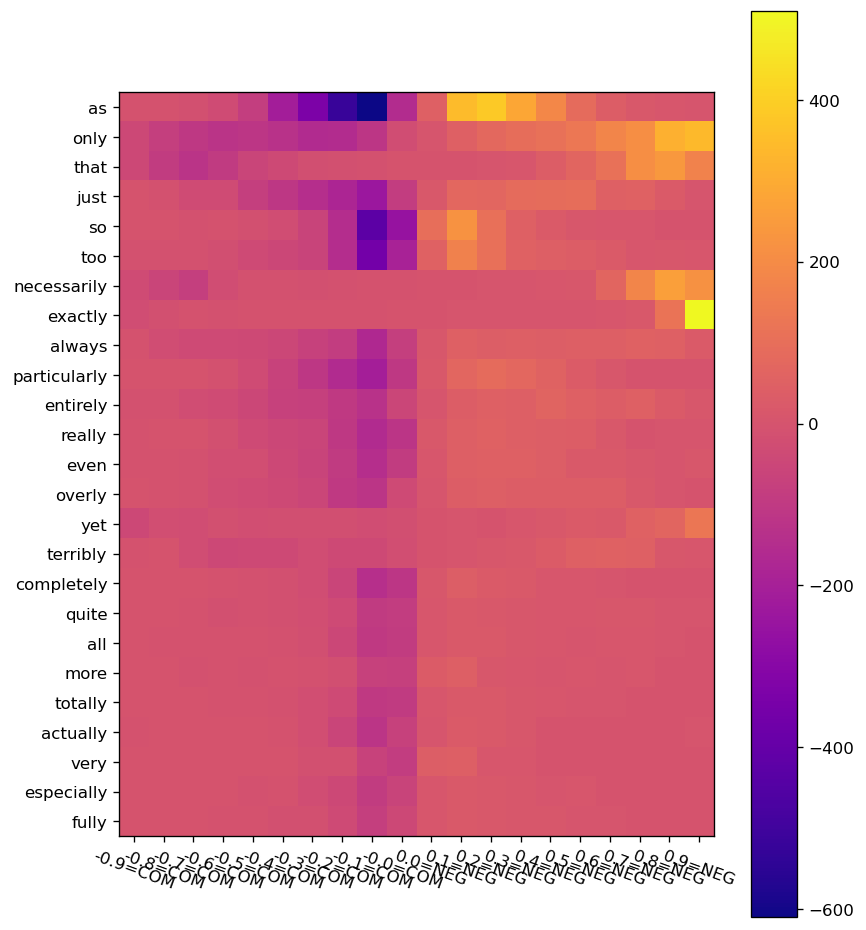

In [16]:
crosstab_by_env(df,values='am_odds_ratio_disc', env_var='env_sensitivity', func='sum')

| adv           |   COMPLEMENT |   NEGATED |   contrast |   neg_contrast |
|:--------------|-------------:|----------:|-----------:|---------------:|
| necessarily   |        -0.65 |      0.78 |       1.44 |           2.22 |
| that          |        -0.62 |      0.72 |       1.34 |           2.07 |
| exactly       |        -0.25 |      0.91 |       1.16 |           2.06 |
| together      |         0.04 |      0.96 |       0.92 |           1.89 |
| honestly      |         0.04 |      0.89 |       0.85 |           1.74 |
| yet           |         0.01 |      0.74 |       0.73 |           1.48 |
| only          |        -0.24 |      0.58 |       0.81 |           1.39 |
| anymore       |         0.01 |      0.69 |       0.68 |           1.37 |
| consequently  |         0.04 |      0.70 |       0.66 |           1.36 |
| precisely     |        -0.02 |      0.66 |       0.68 |           1.34 |
| this          |        -0.03 |      0.60 |       0.63 |           1.23 |
| altogether    |        

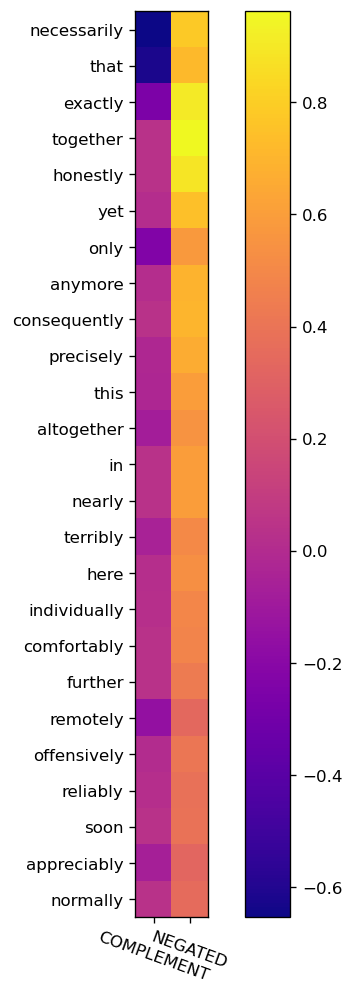

In [17]:
crosstab_by_env(df,func='median')

| adv          |   COMPLEMENT |   NEGATED |   contrast |   neg_contrast |
|:-------------|-------------:|----------:|-----------:|---------------:|
| exactly      |         0.04 |      0.96 |       0.92 |           1.89 |
| that         |         0.04 |      0.96 |       0.92 |           1.89 |
| only         |         0.04 |      0.96 |       0.92 |           1.89 |
| necessarily  |         0.04 |      0.96 |       0.92 |           1.89 |
| yet          |         0.04 |      0.96 |       0.92 |           1.89 |
| remotely     |         0.04 |      0.96 |       0.92 |           1.89 |
| altogether   |         0.04 |      0.96 |       0.92 |           1.89 |
| together     |         0.04 |      0.96 |       0.92 |           1.89 |
| individually |         0.04 |      0.96 |       0.92 |           1.89 |
| therefore    |         0.04 |      0.96 |       0.92 |           1.89 |
| nearly       |         0.04 |      0.96 |       0.92 |           1.89 |
| quite        |         0.04 |      0

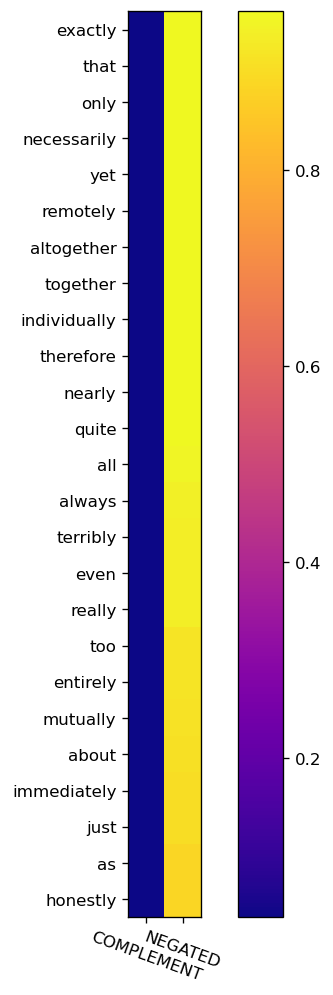

In [18]:
crosstab_by_env(df, func='max')

| adj            |   COMPLEMENT |   NEGATED |   contrast |   neg_contrast |
|:---------------|-------------:|----------:|-----------:|---------------:|
| zero           |         0.02 |      0.96 |       0.95 |           1.91 |
| unconscionable |         0.02 |      0.96 |       0.95 |           1.91 |
| top-notch      |         0.02 |      0.96 |       0.94 |           1.90 |
| unscientific   |         0.03 |      0.96 |       0.93 |           1.89 |
| redeemable     |         0.03 |      0.96 |       0.93 |           1.89 |
| left           |        -0.04 |      0.91 |       0.95 |           1.87 |
| undemocratic   |         0.02 |      0.94 |       0.91 |           1.85 |
| unavoidable    |         0.02 |      0.93 |       0.91 |           1.84 |
| unsupported    |         0.04 |      0.93 |       0.90 |           1.83 |
| invaluable     |         0.03 |      0.93 |       0.90 |           1.83 |
| inconspicuous  |         0.02 |      0.93 |       0.90 |           1.83 |
| mind-blowi

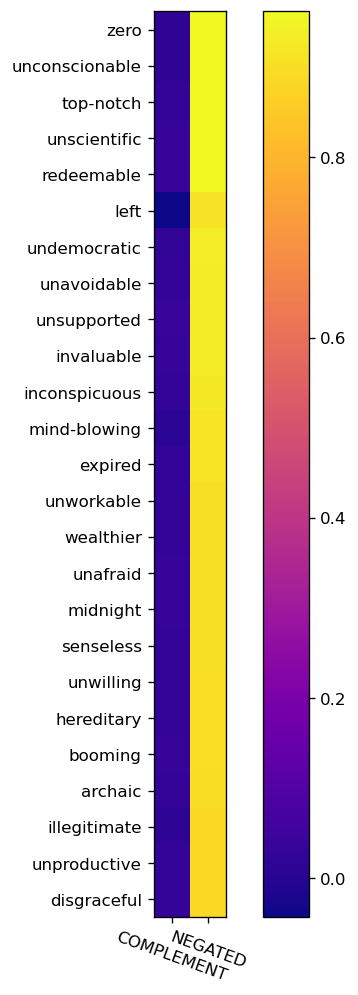

In [19]:
crosstab_by_env(df,'adj')

| adj         |   -0.9=COM |   -0.8=COM |   -0.7=COM |   -0.6=COM |   -0.5=COM |   -0.4=COM |   -0.3=COM |   -0.2=COM |   -0.1=COM |   -0.0=COM |   0.0=NEG |   0.1=NEG |   0.2=NEG |   0.3=NEG |   0.4=NEG |   0.5=NEG |   0.6=NEG |   0.7=NEG |   0.8=NEG |   0.9=NEG |   contrast |   neg_contrast |
|:------------|-----------:|-----------:|-----------:|-----------:|-----------:|-----------:|-----------:|-----------:|-----------:|-----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|-----------:|---------------:|
| sure        |      -6.32 |      -3.15 |      -2.82 |      -1.30 |      -1.43 |      -0.80 |      -0.29 |      -0.41 |      -1.03 |      -0.37 |      0.10 |      0.56 |      0.00 |      0.29 |      0.45 |      1.43 |      1.30 |      3.54 |      3.93 |      9.90 |      39.43 |          60.93 |
| clear       |      -5.39 |      -0.75 |      -0.67 |      -3.13 |       0.00 |      -1.24 |      -1.45 |      

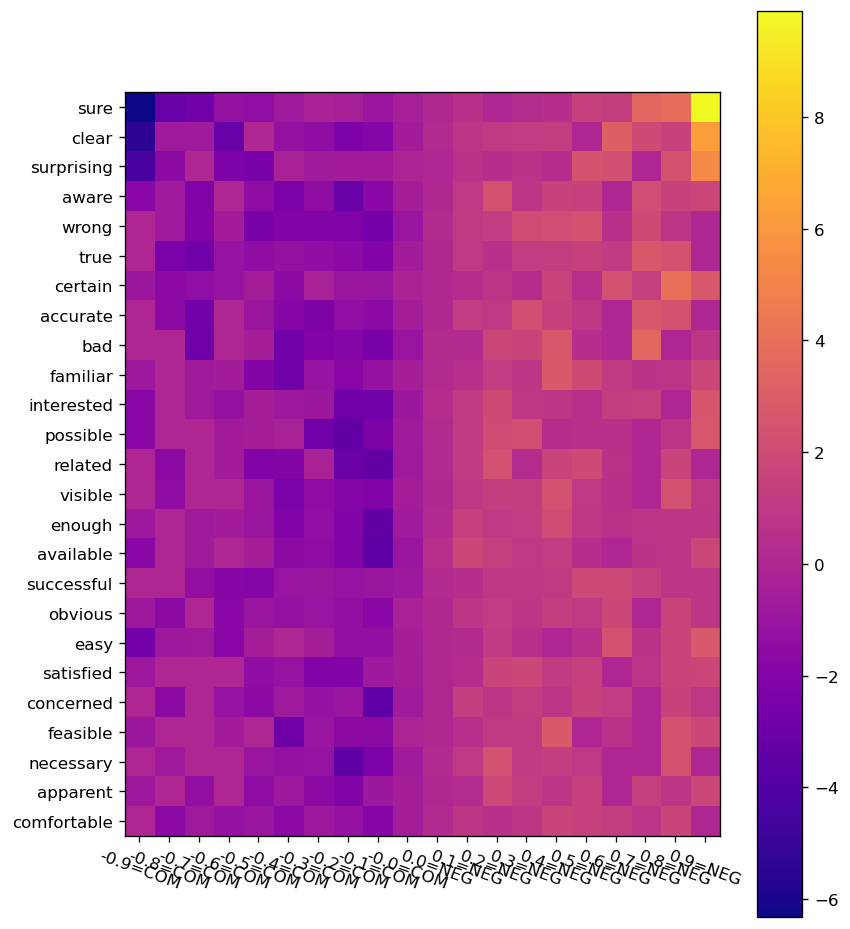

In [20]:
crosstab_by_env(df, col='adj', env_var='env_sensitivity', func='sum' )

In [21]:

for level, bdf in df.loc[df.abs_am_p1_given2 > 0.7, :].groupby(['env_sensitivity']): 
    print(f'\n## env sensitivity: {level}\n')
    print(bdf.value_counts('adv').nlargest(10))


## env sensitivity: -0.7=COM

adv
that           36
necessarily    25
only           24
yet             7
always          6
entirely        6
terribly        5
even            4
so              3
overly          3
dtype: int64

## env sensitivity: -0.8=COM

adv
that           44
only           38
necessarily    27
always         13
yet            10
exactly         6
entirely        5
just            4
too             4
as              2
dtype: int64

## env sensitivity: -0.9=COM

adv
only           18
yet            17
that           17
necessarily    12
exactly        10
entirely        4
too             3
always          2
altogether      2
even            2
dtype: int64

## env sensitivity: 0.7=NEG

adv
that           64
necessarily    60
only           53
yet            19
always         11
terribly       10
just           10
entirely        8
exactly         6
overly          5
dtype: int64

## env sensitivity: 0.8=NEG

adv
only           149
necessarily    125
that           11

In [22]:
from utils.dataframes import transform_counts
# from utils.visualize import heatmap

def pivot_by_env_sensitivity(df, column:'adv', min_p1_given2:float=0.7, env_pole='NEG'): 
    strong = df.copy().loc[df.abs_am_p1_given2 >= min_p1_given2, :]
    ct = pd.crosstab(strong[column], strong.env_sensitivity).sort_values('1.0=NEG', ascending=False)
    heatmap(
        transform_counts(
            ct.loc[:, ct.columns.str.endswith(env_pole),
                        ].head(20)
        )
    )

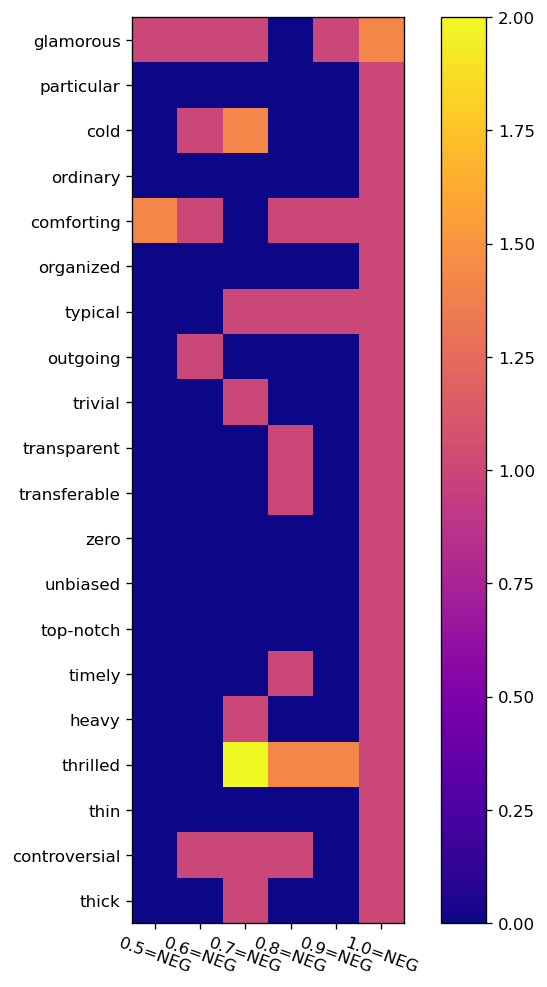

In [23]:
pivot_by_env_sensitivity(df, 'adj', 0.5)

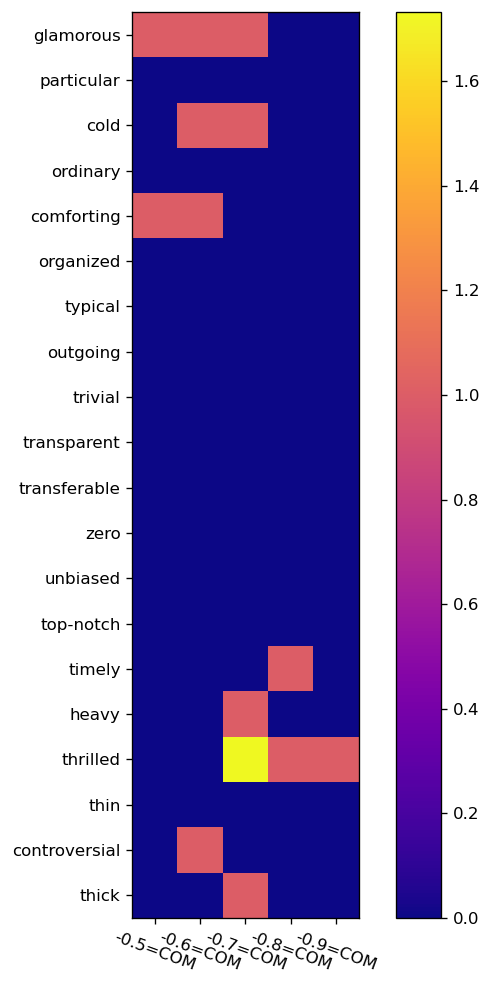

In [24]:
pivot_by_env_sensitivity(df, 'adj', 0.5, 'COM')

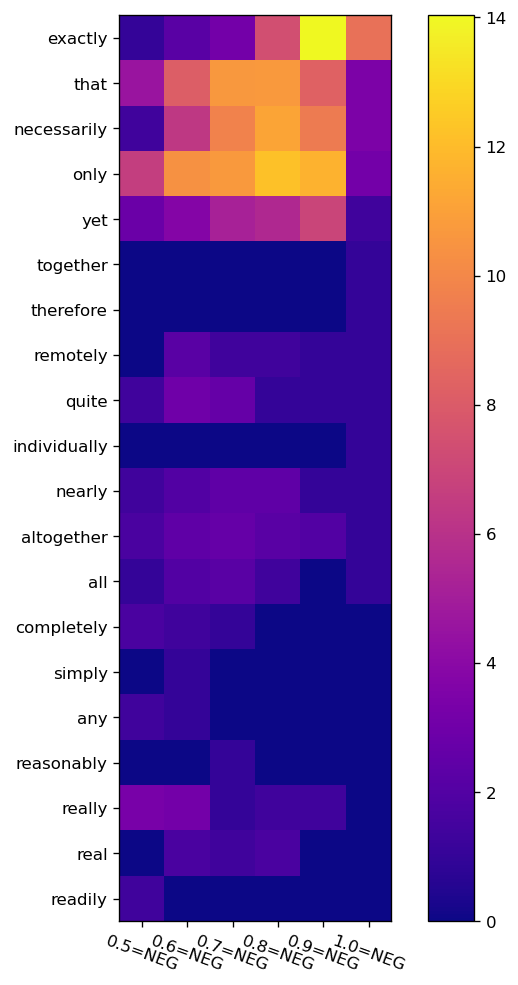

In [25]:
pivot_by_env_sensitivity(df, 'adv', 0.5)

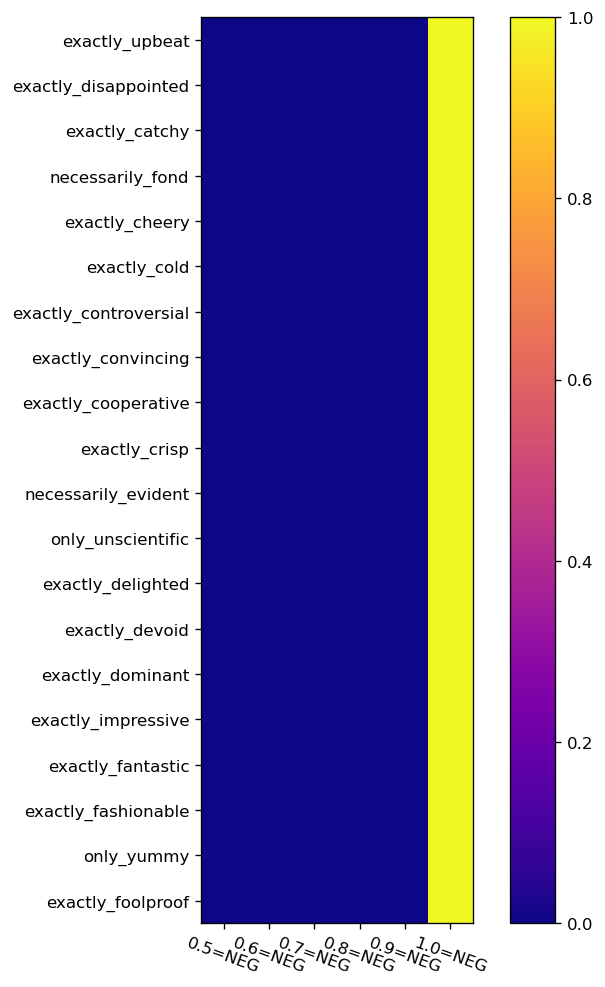

In [26]:
pivot_by_env_sensitivity(df, 'l2', 0.5)

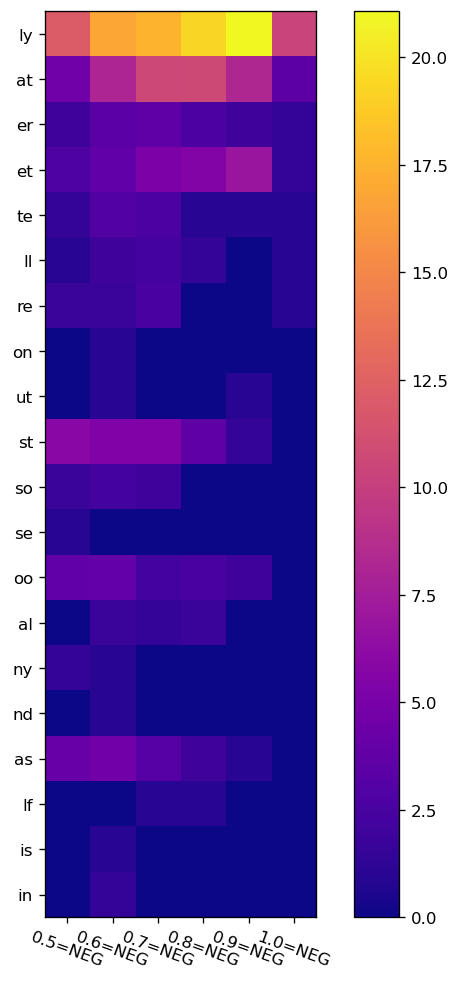

In [27]:
pivot_by_env_sensitivity(df.assign(adv_suff=df.adv.apply(lambda x: x[-2:])), 'adv_suff', 0.5)

In [28]:
slightly = df.loc[df.adv=='slightly', :]
slightly

,l1,l2,f,E11,r_log_likelihood,r_log_likelihood_tt,r_odds_ratio_disc,r_Dice,r_t_score,r_p1_given2,...,am_p1_given2,am_p2_given1,f1,f2,N,adv,adj,abs_am_p1_given2,bin_am_p1_given2,env_sensitivity
692,COMPLEMENT,slightly_longer,2659,2558.373100,4946,8650,693,7166,13267,10234,...,0.037845,0.000033,80132539,2659,83284343,slightly,longer,0.037845,0.0,0.0=COM
793,COMPLEMENT,slightly_slower,2329,2240.861600,5517,9537,794,8057,13662,10256,...,0.037845,0.000029,80132539,2329,83284343,slightly,slower,0.037845,0.0,0.0=COM
1174,COMPLEMENT,slightly_sweet,4898,4713.602800,3056,5576,1175,4161,11698,110783,...,0.037642,0.000061,80132539,4899,83284343,slightly,sweet,0.037642,0.0,0.0=COM
1234,COMPLEMENT,slightly_bent,1579,1519.244500,7566,12634,1235,11239,14880,10359,...,0.037845,0.000020,80132539,1579,83284343,slightly,bent,0.037845,0.0,0.0=COM
1238,COMPLEMENT,slightly_thicker,1574,1514.433700,7589,12668,1239,11325,14893,10361,...,0.037845,0.000020,80132539,1574,83284343,slightly,thicker,0.037845,0.0,0.0=COM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186481,COMPLEMENT,slightly_true,43,54.842898,182347,28502,186482,106800,181906,187046,...,-0.207770,-0.000004,80132539,57,83284343,slightly,true,0.207770,-0.2,-0.2=COM
186729,NEGATED,slightly_better,73,628.852020,190891,2887,186730,9809,191689,170745,...,-0.033457,-0.000183,3151804,16617,83284343,slightly,better,0.033457,-0.0,-0.0=NEG
189931,COMPLEMENT,slightly_close,47,77.934644,187075,13034,189931,101708,186520,190170,...,-0.381910,-0.000010,80132539,81,83284343,slightly,close,0.381910,-0.4,-0.4=COM
191451,NEGATED,slightly_higher,23,975.010130,191589,1385,191452,25494,192151,172124,...,-0.036963,-0.000314,3151804,25764,83284343,slightly,higher,0.036963,-0.0,-0.0=NEG


In [29]:
absolutely = df.loc[df.adv=='absolutely', :]
absolutely

,l1,l2,f,E11,r_log_likelihood,r_log_likelihood_tt,r_odds_ratio_disc,r_Dice,r_t_score,r_p1_given2,...,am_p1_given2,am_p2_given1,f1,f2,N,adv,adj,abs_am_p1_given2,bin_am_p1_given2,env_sensitivity
2997,COMPLEMENT,absolutely_untrue,706,679.282210,13424,21098,2998,21839,18722,11028,...,0.037844,0.000009,80132539,706,83284343,absolutely,untrue,0.037844,0.0,0.0=COM
3575,COMPLEMENT,absolutely_worth,3003,2891.279100,4816,8447,3576,6453,13030,111223,...,0.037180,0.000037,80132539,3005,83284343,absolutely,worth,0.037180,0.0,0.0=COM
4212,COMPLEMENT,absolutely_magical,523,503.207640,16065,24929,4212,27508,20763,11625,...,0.037844,0.000007,80132539,523,83284343,absolutely,magical,0.037844,0.0,0.0=COM
4219,COMPLEMENT,absolutely_astou...,523,503.207640,16065,24929,4212,27508,20763,11625,...,0.037844,0.000007,80132539,523,83284343,absolutely,astounding,0.037844,0.0,0.0=COM
4961,COMPLEMENT,absolutely_enormous,456,438.743180,17389,26818,4960,30709,21910,12015,...,0.037844,0.000006,80132539,456,83284343,absolutely,enormous,0.037844,0.0,0.0=COM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186709,NEGATED,absolutely_beaut...,36,311.266040,189909,5192,186710,17972,191431,170749,...,-0.033470,-0.000091,3151804,8225,83284343,absolutely,beautiful,0.033470,-0.0,-0.0=NEG
187892,NEGATED,absolutely_right,40,421.959440,190495,3787,187893,16472,191628,171197,...,-0.034261,-0.000126,3151804,11150,83284343,absolutely,right,0.034261,-0.0,-0.0=NEG
188041,NEGATED,absolutely_fanta...,22,241.368370,189613,5897,188042,26351,191445,171224,...,-0.034397,-0.000072,3151804,6378,83284343,absolutely,fantastic,0.034397,-0.0,-0.0=NEG
188670,COMPLEMENT,absolutely_concl...,34,49.069961,184165,22408,188671,121681,183956,189064,...,-0.295490,-0.000005,80132539,51,83284343,absolutely,conclusive,0.295490,-0.3,-0.3=COM


| adj              |   COMPLEMENT |   NEGATED |   contrast |   neg_contrast |
|:-----------------|-------------:|----------:|-----------:|---------------:|
| little           |         0.04 |     -1.00 |       1.04 |           0.04 |
| significant      |         0.04 |     -1.00 |       1.04 |           0.04 |
| quick            |         0.04 |     -1.00 |       1.04 |           0.04 |
| tight            |         0.04 |     -1.00 |       1.04 |           0.04 |
| fair             |         0.04 |     -1.00 |       1.04 |           0.04 |
| successful       |         0.04 |     -1.00 |       1.04 |           0.04 |
| slow             |         0.04 |     -1.00 |       1.04 |           0.04 |
| slim             |         0.04 |     -1.00 |       1.04 |           0.04 |
| huge             |         0.04 |     -1.00 |       1.04 |           0.04 |
| pink             |         0.04 |     -1.00 |       1.04 |           0.04 |
| hefty            |         0.04 |     -1.00 |       1.04 |    

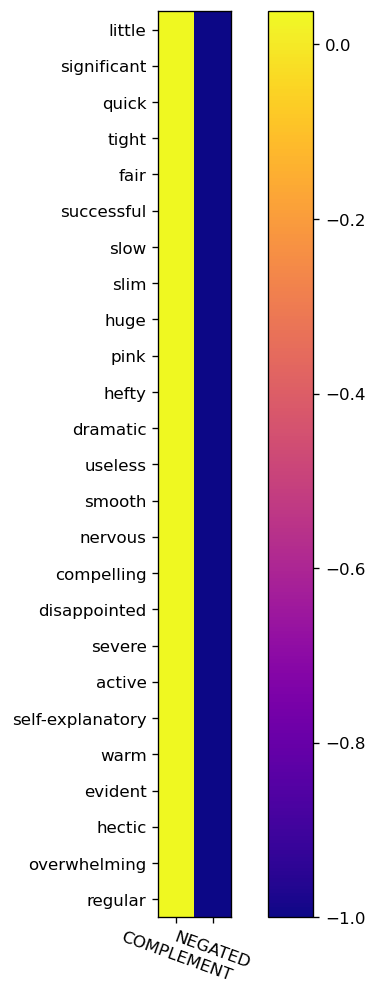

In [30]:
pretty = df.loc[df.adv=='pretty']
crosstab_by_env(pretty, col='adj', sort_by='contrast', fillna=True)

| adj            |   COMPLEMENT |   NEGATED |   contrast |   neg_contrast |
|:---------------|-------------:|----------:|-----------:|---------------:|
| slight         |         0.04 |     -1.00 |       1.04 |           0.04 |
| earliest       |         0.04 |     -1.00 |       1.04 |           0.04 |
| simplistic     |         0.04 |     -1.00 |       1.04 |           0.04 |
| horny          |         0.04 |     -1.00 |       1.04 |           0.04 |
| preliminary    |         0.04 |     -1.00 |       1.04 |           0.04 |
| hectic         |         0.04 |     -1.00 |       1.04 |           0.04 |
| cost           |         0.04 |     -1.00 |       1.04 |           0.04 |
| doubtful       |         0.04 |     -1.00 |       1.04 |           0.04 |
| primitive      |         0.04 |     -1.00 |       1.04 |           0.04 |
| relieved       |         0.04 |     -1.00 |       1.04 |           0.04 |
| informal       |         0.04 |     -1.00 |       1.04 |           0.04 |
| crude     

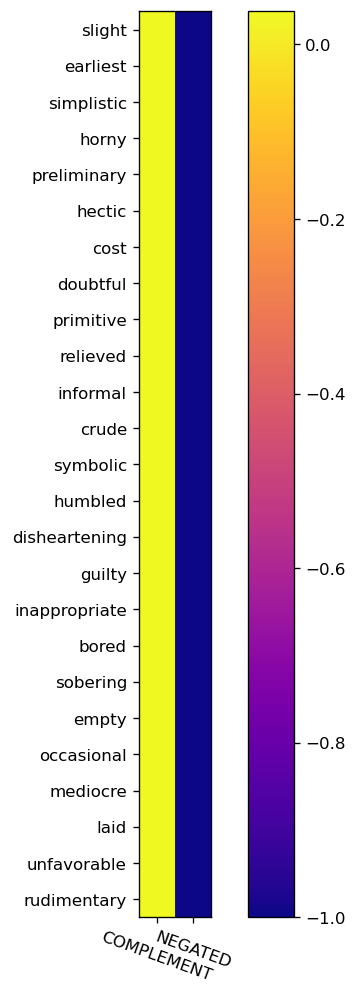

In [31]:
crosstab_by_env(df.loc[df.adv=='very', :], col='adj', sort_by='COMPLEMENT', fillna=True)

In [32]:
df.sort_values('r_t_score').filter(regex=r'^[^r][^_]')

,l1,l2,E11,am_log_likelihood,am_log_likelihood_tt,am_odds_ratio_disc,am_Dice,am_t_score,am_p1_given2,am_p2_given1,f1,f2,adv,adj,abs_am_p1_given2,bin_am_p1_given2,env_sensitivity
35380,NEGATED,as_good,8906.4852,80113.351562,80113.351562,0.784106,0.026570,170.140808,0.153788,0.011901,3151804,235348,as,good,0.153788,0.2,0.2=NEG
2160,NEGATED,so_sure,1350.1188,134655.390625,134655.390625,1.875981,0.016692,154.823395,0.708115,0.008327,3151804,35676,so,sure,0.708115,0.7,0.7=NEG
2454,NEGATED,quite_sure,1374.4903,129352.687500,129352.687500,1.820319,0.016419,153.284714,0.683076,0.008178,3151804,36320,quite,sure,0.683076,0.7,0.7=NEG
357,NEGATED,immediately_clear,1024.2829,152707.203125,152707.203125,2.559260,0.015904,152.551437,0.896424,0.007998,3151804,27066,immediately,clear,0.896424,0.9,0.9=NEG
12243,NEGATED,as_bad,2678.1747,90553.656250,90553.656250,1.218877,0.017232,150.558868,0.354805,0.008273,3151804,70769,as,bad,0.354805,0.4,0.4=NEG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191048,NEGATED,most_important,28327.4050,-49484.390625,49484.390625,-1.488037,0.000494,-881.315918,-0.036888,-0.009023,3151804,748533,most,important,0.036888,-0.0,-0.0=NEG
190429,NEGATED,so_many,45104.7770,-75162.625000,75162.625000,-1.348330,0.000980,-931.639771,-0.036582,-0.014172,3151804,1191864,so,many,0.036582,-0.0,-0.0=NEG
192103,NEGATED,very_little,9148.0428,-17841.115234,17841.115234,-2.124952,0.000042,-1077.246826,-0.037659,-0.002993,3151804,241731,very,little,0.037659,-0.0,-0.0=NEG
191920,NEGATED,not_sure,17681.1600,-33665.832031,33665.832031,-1.902007,0.000128,-1148.136230,-0.037560,-0.005754,3151804,467213,not,sure,0.037560,-0.0,-0.0=NEG


In [33]:
df.sort_values('r_log_likelihood').filter(regex=r'^[^r][^_]')

,l1,l2,E11,am_log_likelihood,am_log_likelihood_tt,am_odds_ratio_disc,am_Dice,am_t_score,am_p1_given2,am_p2_given1,f1,f2,adv,adj,abs_am_p1_given2,bin_am_p1_given2,env_sensitivity
357,NEGATED,immediately_clear,1024.2829,152707.203125,152707.203125,2.559260,0.015904,152.551437,0.896424,0.007998,3151804,27066,immediately,clear,0.896424,0.9,0.9=NEG
648,NEGATED,always_easy,1037.0363,143317.640625,143317.640625,2.350501,0.015471,150.205383,0.859859,0.007767,3151804,27403,always,easy,0.859859,0.9,0.9=NEG
2160,NEGATED,so_sure,1350.1188,134655.390625,134655.390625,1.875981,0.016692,154.823395,0.708115,0.008327,3151804,35676,so,sure,0.708115,0.7,0.7=NEG
2454,NEGATED,quite_sure,1374.4903,129352.687500,129352.687500,1.820319,0.016419,153.284714,0.683076,0.008178,3151804,36320,quite,sure,0.683076,0.7,0.7=NEG
701,NEGATED,really_sure,761.6084,103557.859375,103557.859375,2.314467,0.011290,128.121735,0.852101,0.005653,3151804,20125,really,sure,0.852101,0.9,0.9=NEG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192184,COMPLEMENT,really_sure,19363.3920,-103557.859375,103557.859375,-2.314467,0.000055,-363.951416,-0.852101,-0.005653,80132539,20125,really,sure,0.852101,-0.9,-0.9=COM
191807,COMPLEMENT,quite_sure,34945.5100,-129352.687500,129352.687500,-1.820319,0.000253,-246.182266,-0.683076,-0.008178,80132539,36320,quite,sure,0.683076,-0.7,-0.7=COM
191881,COMPLEMENT,so_sure,34325.8810,-134655.390625,134655.390625,-1.875981,0.000226,-265.090607,-0.708115,-0.008327,80132539,35676,so,sure,0.708115,-0.7,-0.7=COM
192193,COMPLEMENT,always_easy,26365.9640,-143317.640625,143317.640625,-2.350501,0.000070,-444.275146,-0.859859,-0.007767,80132539,27403,always,easy,0.859859,-0.9,-0.9=COM
